In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Write a Euler function and solve the ODE.

In [2]:
def fun1(x,y):
    z = 2*y -18*x
    w = z/(1+x)
    return(w)

def Euler(func, x_0, y_0, h, N):
    v = x_0 + h*(N)
    x = np.linspace(x_0, v, N+1)
    A = [y_0, ]
    for i in range (N):
        y = y_0 + h * func(x[i],y_0)
        y_0 = y
        A.append(y_0)
        
    #plt.plot(x, A, label='Euler')
    return (A)

Text(0, 0.5, 'Absolute Error')

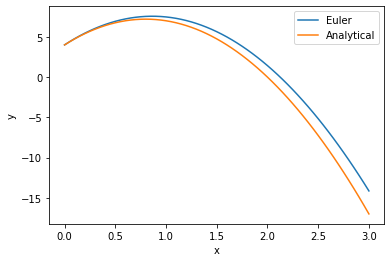

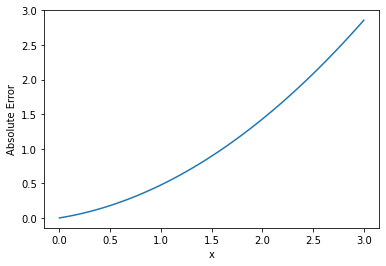

In [3]:
A=Euler(fun1, 0, 4, 0.05, 60)
x = np.linspace(0, 3, 61)
y = -5 * x**2 + 8*x + 4
plt.plot(x, A, label= 'Euler')
plt.plot(x,y, label='Analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show

absolute_error = (np.abs((y - A)))
plt.figure()
plt.plot(x, absolute_error)
plt.xlabel('x')
plt.ylabel('Absolute Error')


Coupled ODE:


In [4]:
#Euler Equation for M dimensions or M Coupled Equations
# x is equivalent to x 
# y is equivalent to p
# func2 is dy/dt i.e; dp/dt
# func1 is dx/dt 

def func2(x,y,k):
    return(-k*x)

def func1(x,y,m):
    return(y/m)

def F(x,y, k, m):
    dx = func1(x,y,m)
    dy = func2(x,y,k)
    return dx,dy
    
def F_array(x, y, k, m):
    dx = func1(x,y,m)
    dy = func2(x,y,k)
    arr = [dx, dy]
    return(arr)
    
def Euler_gen(func, x_0, y_0, h, N, M):
    arr = [[0 for x in range(N+1)] for y in range(M)]
    arr[0][0]=x_0
    arr[1][0]=y_0
    k = 1
    m = 1
    for i in range(N):
        dx, dy = F(arr[0][i], arr[1][i], k, m)

        arr[0][i+1]=arr[0][i] + h*dx
        arr[1][i+1]=arr[1][i] + h*dy
    
    return(arr)

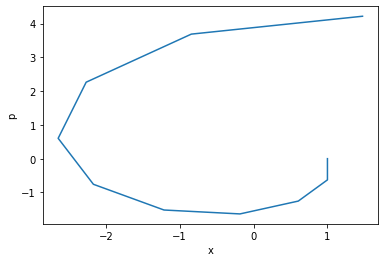

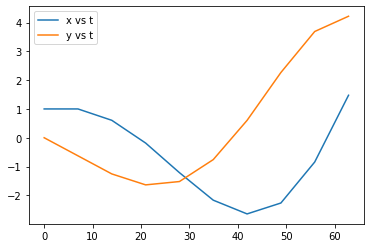

Text(0, 0.5, 'Energy Relative Error')

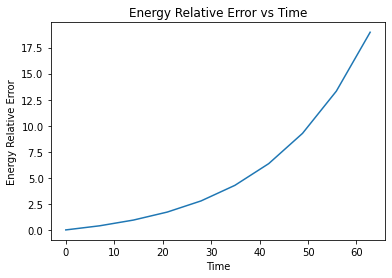

In [5]:
#Phase Space Trajectory 
#Time Period is 2pi s
# Time interval is [0,10*2*3.1415]
# S= 1/10, 1/100, 1/1000

A=Euler_gen(F, 1, 0, 0.6283, 10, 2 )
x_axis=[]
y_axis=[]
for i in range(10):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83, 10)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

#Actual calcuated energy E = 0.5J
#En at any instant is given by p^2/2m + 1/2 k x^2
E=0.5
En =[]
relative_error=[]
for i in range (10):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')

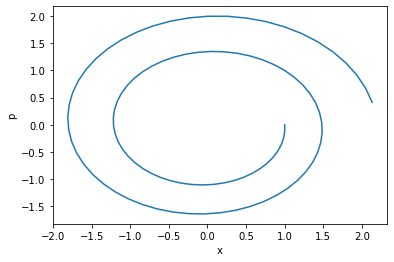

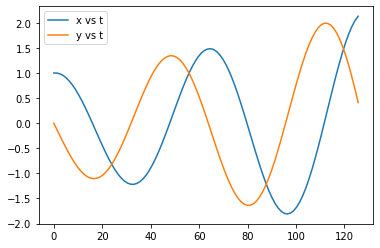

Text(0, 0.5, 'Energy Relative Error')

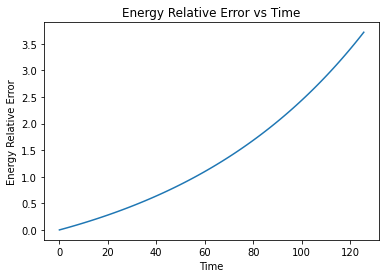

In [6]:
A=Euler_gen(F, 1, 0, 0.06283*2, 100, 2 )
x_axis=[]
y_axis=[]
for i in range(100):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83*2, 100)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

#Actual calcuated energy E = 0.5J
#En at any instant is given by p^2/2m + 1/2 k x^2
E=0.5
En =[]
relative_error=[]
for i in range (100):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')

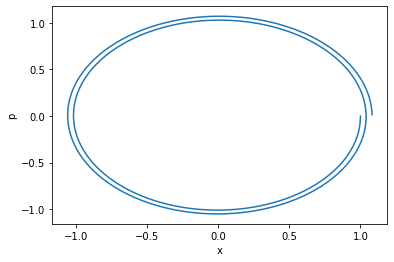

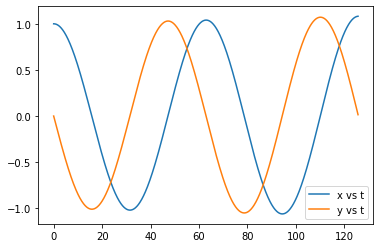

Text(0, 0.5, 'Energy Relative Error')

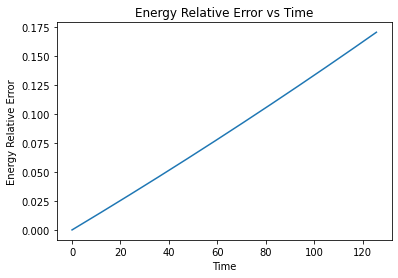

In [7]:
#S=1000
A=Euler_gen(F, 1, 0, 0.006283*2, 1000, 2 )
x_axis=[]
y_axis=[]
for i in range(1000):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83*2, 1000)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

E=0.5
En =[]
relative_error=[]
for i in range (1000):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')

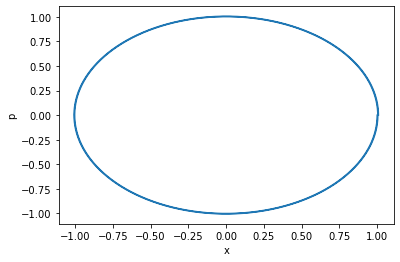

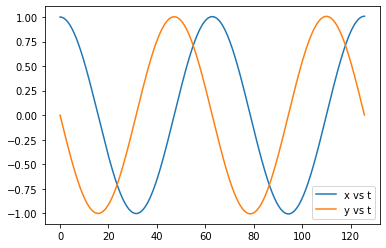

Text(0, 0.5, 'Energy Relative Error')

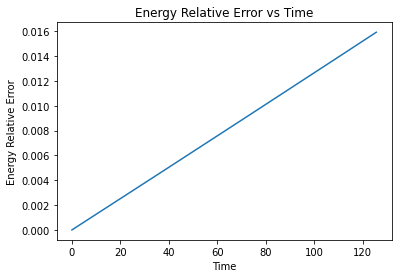

In [8]:
#S=10000
A=Euler_gen(F, 1, 0, 0.0006283*2, 10000, 2 )
x_axis=[]
y_axis=[]
for i in range(10000):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83*2, 10000)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

E=0.5
En =[]
relative_error=[]
for i in range (10000):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')

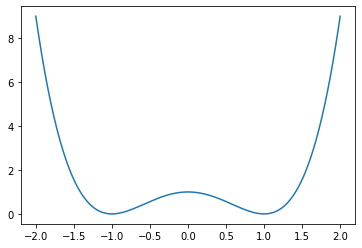

In [9]:
#Double Well Potential 
#V(x)=(x^2 - 1)^2
x=np.array(np.linspace(-2, 2, 1000))
V= (x**2 -1)**2
plt.plot(x,V)

In [10]:
def func3(x,y,k):
    w= 4*x - 4*x**3
    return (w)

def F2(x,y, k, m):
    dx = func1(x,y,m)
    dy = func3(x,y,k)
    return dx,dy


/tmp/ipykernel_18285/1406564385.py:14: RuntimeWarning: invalid value encountered in sqrt
  y.append(w**0.5)
/tmp/ipykernel_18285/1406564385.py:15: RuntimeWarning: invalid value encountered in sqrt
  z.append(-(w**0.5))


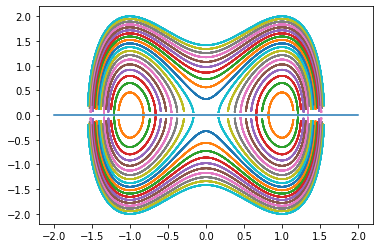

In [11]:
#Contours corresponding to different values of Energies.
#E = p^2/2m + (x^2 -1 )^2
# p^2 =(2m (E - (x^2 -1)^2))

#E=np.linspace(0, 2, 20)
E=np.linspace(0,2, 20)
x= np.linspace(-2, 2, 1000)

for i in E:
    y=[]
    z=[]
    for i in x:
        w=((2*(E-(i**2 -1)**2)))
        y.append(w**0.5)
        z.append(-(w**0.5))
    plt.plot(x,y)
    plt.plot(x,z)

w=np.array(x)
plt.plot(x,w*0)

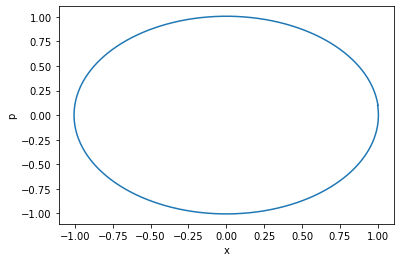

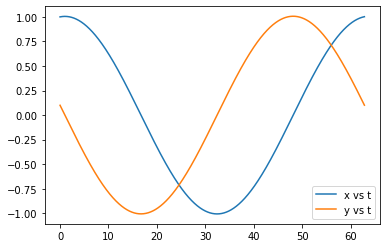

Text(0, 0.5, 'Energy Relative Error')

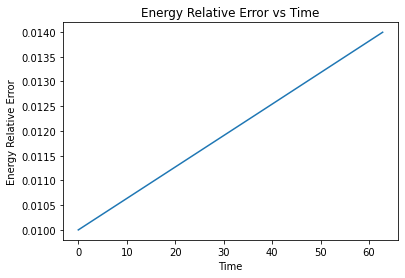

In [12]:
A=Euler_gen(F2,1 ,0.1 , 0.0006283, 10000, 2)
x_axis=[]
y_axis=[]
for i in range(10000):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83, 10000)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

E=0.5
En =[]
relative_error=[]
for i in range (10000):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')


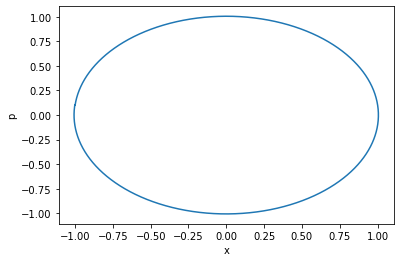

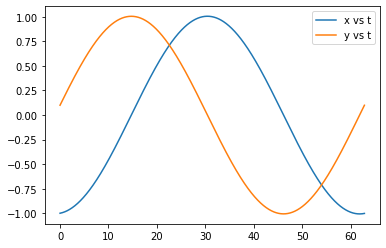

Text(0, 0.5, 'Energy Relative Error')

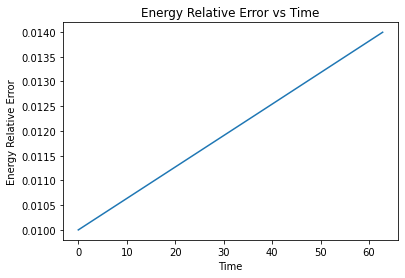

In [13]:
A=Euler_gen(F2,-1 ,0.1 , 0.0006283, 10000, 2)
x_axis=[]
y_axis=[]
for i in range(10000):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83, 10000)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

E=0.5
En =[]
relative_error=[]
for i in range (10000):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')


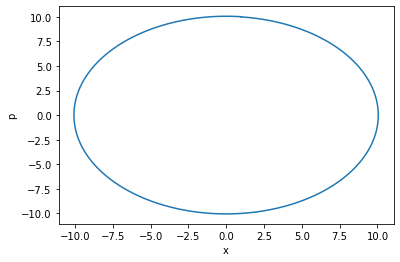

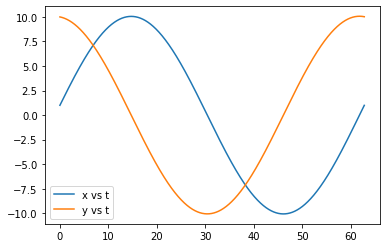

Text(0, 0.5, 'Energy Relative Error')

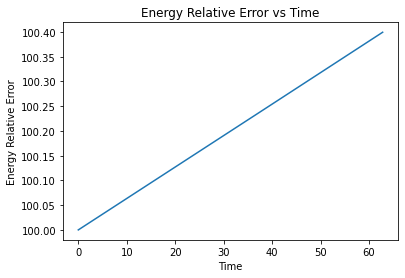

In [14]:
A=Euler_gen(F2,1 ,10 , 0.0006283, 10000, 2)
x_axis=[]
y_axis=[]
for i in range(10000):
    x_axis.append(A[0][i])
    y_axis.append(A[1][i])
plt.plot(x_axis, y_axis)
plt.xlabel('x')
plt.ylabel('p')

t=np.linspace(0, 62.83, 10000)
plt.figure()
plt.plot(t, x_axis, label='x vs t')
plt.plot(t, y_axis, label='y vs t')
plt.legend()
plt.show()

E=0.5
En =[]
relative_error=[]
for i in range (10000):
    En.append(0.5 * (x_axis[i])**2  + 0.5 * (y_axis[i])**2)
    
for i in En:
    relative_error.append(np.abs((i - E)/E))
    
plt.figure()
plt.plot(t,relative_error)
plt.title('Energy Relative Error vs Time')
plt.xlabel('Time')
plt.ylabel('Energy Relative Error')

In [15]:
#solving func1 with Runge Kutta Method
def RK(f, x_0, y_0, h, N):
    x=np.linspace(x_0, x_0+h*N, N+1)
    y=[]
    y.append(y_0)
    for i in range (N):
        S_0 = f(x_0,y_0)
        S_1 = f(x_0+h, y_0 + h*S_0)
        y_1 = y_0 + 0.5*h* (S_0 + S_1)
        y.append(y_1)
        x_0 = x_0 + h
        y_0 = y_1
    
    return  y

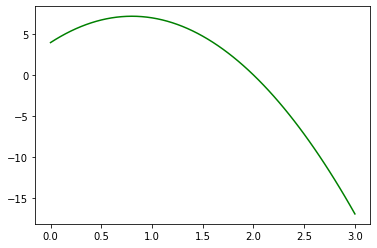

In [16]:
x = np.linspace(0, 3, 61)
y1 = RK(fun1, 0, 4, 0.05, 60)
plt.plot(x, y1, label='RK Method', color='Green')


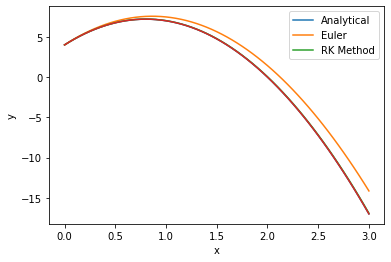

In [17]:
y1 = RK(fun1, 0, 4, 0.05, 60)

A = Euler(fun1, 0, 4, 0.05, 60)


x = np.linspace(0, 3, 61)
y=[]
for i in x:
    y.append(-5 * i**2 + 8*i + 4)
plt.plot(x,y, label='Analytical')
    
    
plt.plot(x, A, label= 'Euler')
plt.plot(x, y1, label='RK Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show
plt.plot(x,y)

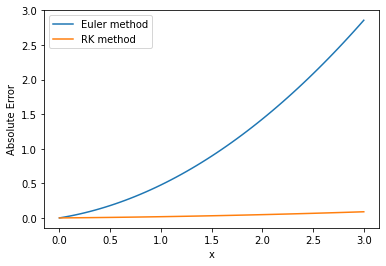

In [18]:
A=Euler(fun1, 0, 4, 0.05, 60)
x = np.linspace(0, 3, 61)
y = -5 * x**2 + 8*x + 4
absolute_error = (np.abs((y - A)))
error = (np.abs((y - y1)))

plt.figure()
plt.plot(x, absolute_error, label ='Euler method')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.plot(x, error, label ='RK method')
plt.legend()
plt.show()

In [19]:
#Generalizing the RK method for M dimensions:
# f1 is dy/dx
# f2 is dz/dx

def f1(x,y,z):
    return(-x - y*z)

def f2(x,y,z):
    return(-y - x*z)

def F(x,y,z):
    dy = f1(x,y,z)
    dz = f2(x,y,z)
    return dy,dz
    
def RK_gen(F, x_0, y_0, z_0, h, N, M):
    arr = [[0 for x in range(N+1)] for y in range(M)]
    x = np.linspace(x_0, x_0+h*N, N+1)
    arr[0][0]=y_0
    arr[1][0]=z_0
    for i in range (N):
        Sy_0, Sz_0 = F(x_0, y_0, z_0)
        Sy_1, Sz_1 = F(x_0 + h, y_0 + h* Sy_0, z_0 + h*Sz_0)
        arr[0][i+1]=arr[0][i] + 0.5*h*(Sy_0 +Sy_1)
        arr[1][i+1]=arr[1][i] + 0.5*h*(Sz_0 + Sz_1)
        x_0 = x_0 +h
        y_0 = arr[0][i+1]
        z_0 = arr[1][i+1]
        
    return (arr)


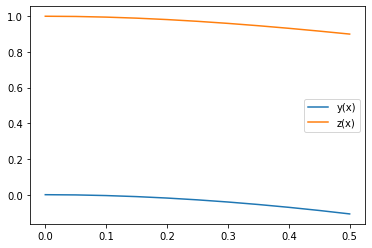

In [20]:
arr = RK_gen(F, 0, 0, 1, 0.05, 10, 2)
x = np.linspace(0, 0.5, 11)
plt.plot(x, arr[0], label='y(x)')
plt.plot(x, arr[1], label='z(x)')
plt.legend()
plt.show()

In [21]:
#Path of the Moving Electron

def S2(q, m, E, B):
    
    def s2(t, x, h, n):
        
        def S1(t, x, n):
            return np.array([(q/m)*(E[0]+(x[1]*B[2] - B[1]*x[2])), (q/m)*(E[1]+(x[2]*B[0] - B[2]*x[0])), 
                            (q/m)*(E[2]+(x[0]*B[1] - B[1]*x[0])), x[0], x[1], x[2]]).reshape(n, )
        
        return S1((t + 0.5*h), (x + (0.5*h*S1(t, x, n))), n)

    return s2

def RK2_gen(S2, t0, x0, h, N, n):
    
    x_vals = np.zeros((x0.shape[0], N))
    t_vals = []
    x_vals[:, 0] = x0
    t_vals.append(t0)
    
    for i in range(1, N):
        x_vals[:, i] = x_vals[:, i-1] + (h*S2(t_vals[i-1], x_vals[:, i-1], h, n)) 

        t_vals.append(t_vals[i-1] + h)
    
    return x_vals


In [22]:
t0 = 0
b = 1e-6
x0 = np.array([1, 1, 1, 0, 0, 0])
h = 1e-9
N = 1+int((b-t0)/h)
t_arr = np.array([t0 + i*h for i in range(N)])
q = -1.6e-19
m = 9.11e-31

Case 1: t =[0, le-6], h = le-9

In [23]:
E1 = [0, 0, 0]
B1 = [0, 0, 1e-4]

# Numerical solution:
arr = RK2_gen(S2(q, m, E1, B1), t0, x0, h, N, x0.shape[0])

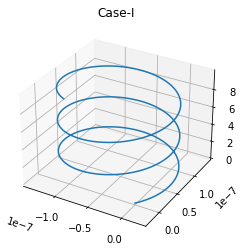

In [24]:
fig = plt.figure() 
ax = plt.axes(projection ='3d')
ax.plot3D(arr[3, :], arr[4, :], arr[5, :])
ax.set_title('Case-I')
plt.show()

Case 2 : t =[0, le-6], h = le-9

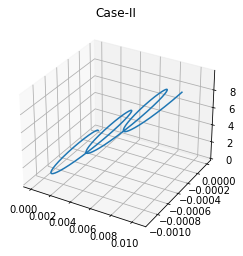

In [25]:
t0 = 0
b = 1e-6
x0 = np.array([1, 1, 1, 0, 0, 0])
h = 1e-9
N = 1+int((b-t0)/h)
t_arr = np.array([t0 + i*h for i in range(N)])
q = -1.6e-19
m = 9.11e-31
E1 = [0, 1, 0]
B1 = [0, 0, 1e-4]

# Numerical solution:
arr = RK2_gen(S2(q, m, E1, B1), t0, x0, h, N, x0.shape[0])

fig = plt.figure() 
ax = plt.axes(projection ='3d')
ax.plot3D(arr[3, :], arr[4, :], arr[5, :])
ax.set_title('Case-II')
plt.show()

Case 1: t =[0, le-9], h = le-12

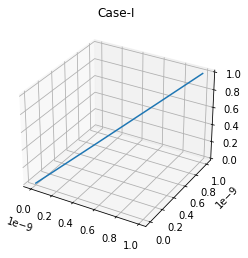

In [26]:
t0 = 0
b = 1e-9
x0 = np.array([1, 1, 1, 0, 0, 0])
h = 1e-12
N = 1+int((b-t0)/h)
t_arr = np.array([t0 + i*h for i in range(N)])
q = -1.6e-19
m = 9.11e-31
E1 = [0, 0, 0]
B1 = [0, 0, 1e-4]

# Numerical solution:
arr = RK2_gen(S2(q, m, E1, B1), t0, x0, h, N, x0.shape[0])

fig = plt.figure() 
ax = plt.axes(projection ='3d')
ax.plot3D(arr[3, :], arr[4, :], arr[5, :])
ax.set_title('Case-I')
plt.show()

Case 2: t =[0, le-9], h = le-12

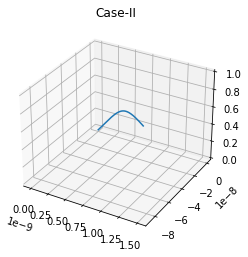

In [30]:
t0 = 0
b = 1e-9
x0 = np.array([1, 1, 1, 0, 0, 0])
h = 1e-12
N = 1+int((b-t0)/h)
t_arr = np.array([t0 + i*h for i in range(N)])
q = -1.6e-19
m = 9.11e-31
E1 = [0, 1, 0]
B1 = [0, 0, 1e-4]

# Numerical solution:
arr = RK2_gen(S2(q, m, E1, B1), t0, x0, h, N, x0.shape[0])

fig = plt.figure() 
ax = plt.axes(projection ='3d')
ax.plot3D(arr[3, :], arr[4, :], arr[5, :])
ax.set_title('Case-II')
plt.show()